                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

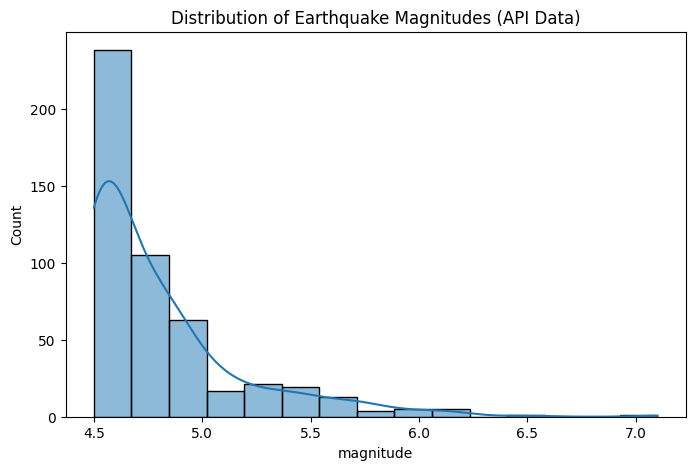

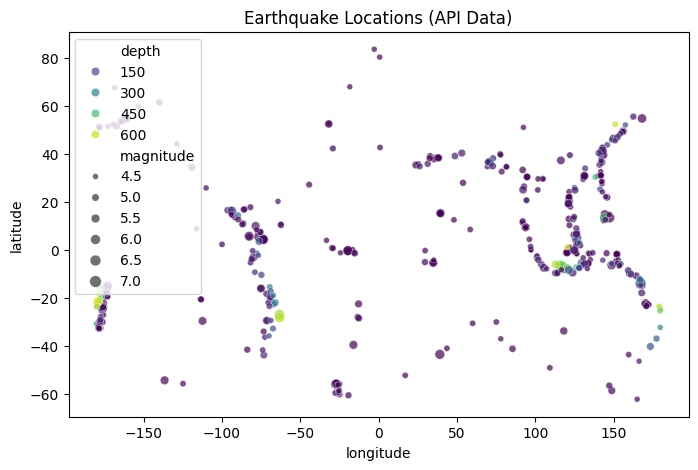

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

# --- EDA ---
print(df_api.describe())
print(df_api.info())

# --- Visualizations ---
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()




           Latitude      Longitude          Depth      Magnitude
count  108645.00000  108645.000000  108645.000000  108645.000000
mean        3.63530      41.743382      61.428857       5.440667
std        30.36088     121.868456     107.635828       0.478416
min       -77.08000    -179.997000      -4.000000       5.000000
25%       -17.84000     -71.901000      10.000000       5.100000
50%        -0.85600     100.781000      33.000000       5.300000
75%        29.66920     143.203000      51.000000       5.630000
max        87.38600     180.000000     700.000000       9.500000
Missing values: Date         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Location     0
dtype: int64


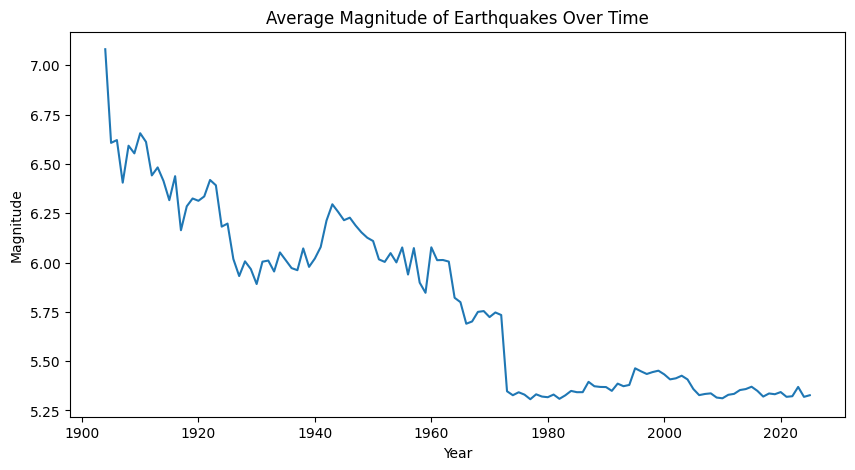

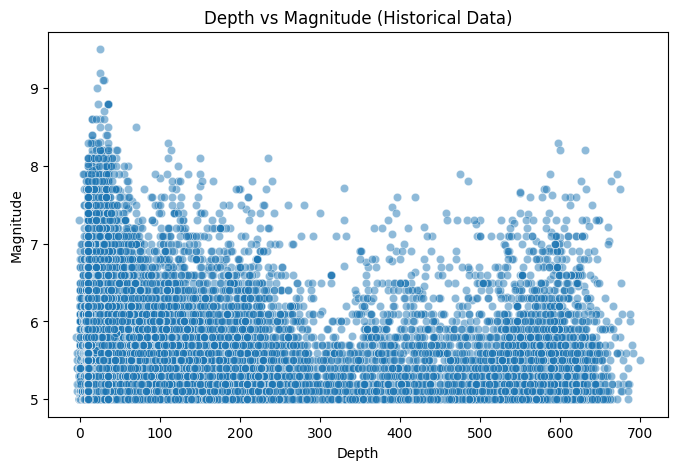

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a historical dataset (Kaggle/NOAA/USGS archive)

df_hist = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/Significant_Earthquakes.csv")

# Select & clean - using the correct column names from your dataset
df_hist = df_hist[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_hist['time'] = pd.to_datetime(df_hist['time'], errors='coerce')
df_hist = df_hist.dropna()

# Rename columns to more descriptive names (optional but recommended)
df_hist = df_hist.rename(columns={
    'time': 'Date',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth': 'Depth',
    'mag': 'Magnitude',
    'place': 'Location'
})

# --- EDA ---
print(df_hist.describe())
print("Missing values:", df_hist.isnull().sum())

# Time series trend
df_hist['Year'] = df_hist['Date'].dt.year
plt.figure(figsize=(10,5))
sns.lineplot(data=df_hist.groupby('Year')['Magnitude'].mean().reset_index(), x='Year', y='Magnitude')
plt.title("Average Magnitude of Earthquakes Over Time")
plt.show()

# Magnitude vs Depth
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Depth vs Magnitude (Historical Data)")
plt.show()


Setting CRS to EPSG:4326 (WGS84)
Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Number of soil types: 34112
CRS: EPSG:4326

First few rows:
   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.67598 

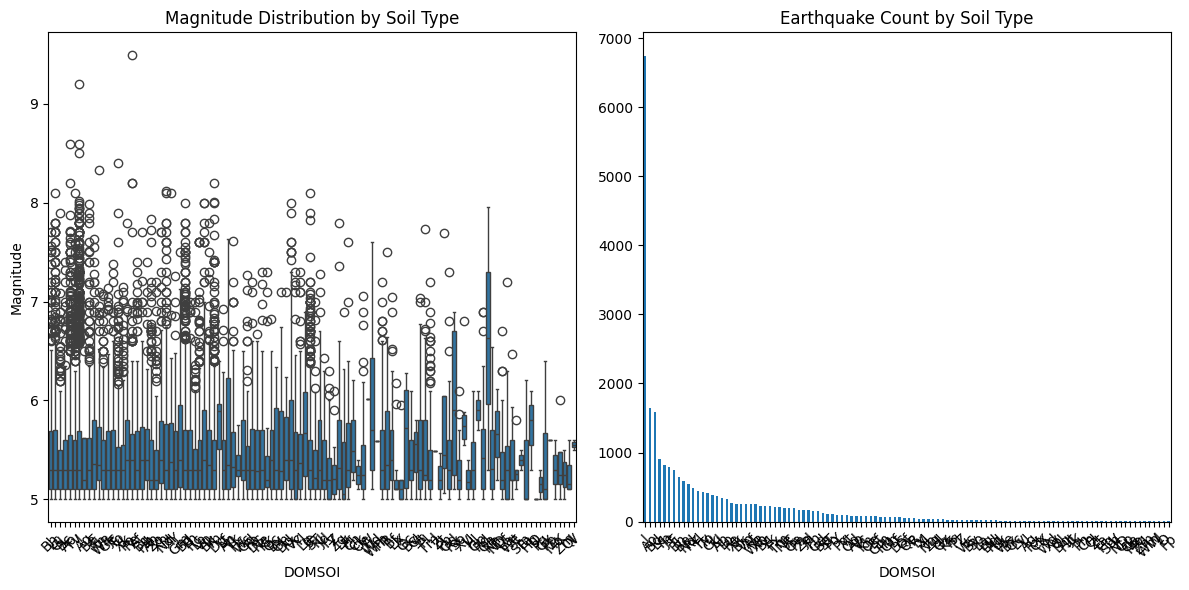

C:\Users\Sarthak Singh\AppData\Local\Temp\ipykernel_21200\1317361526.py:104: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


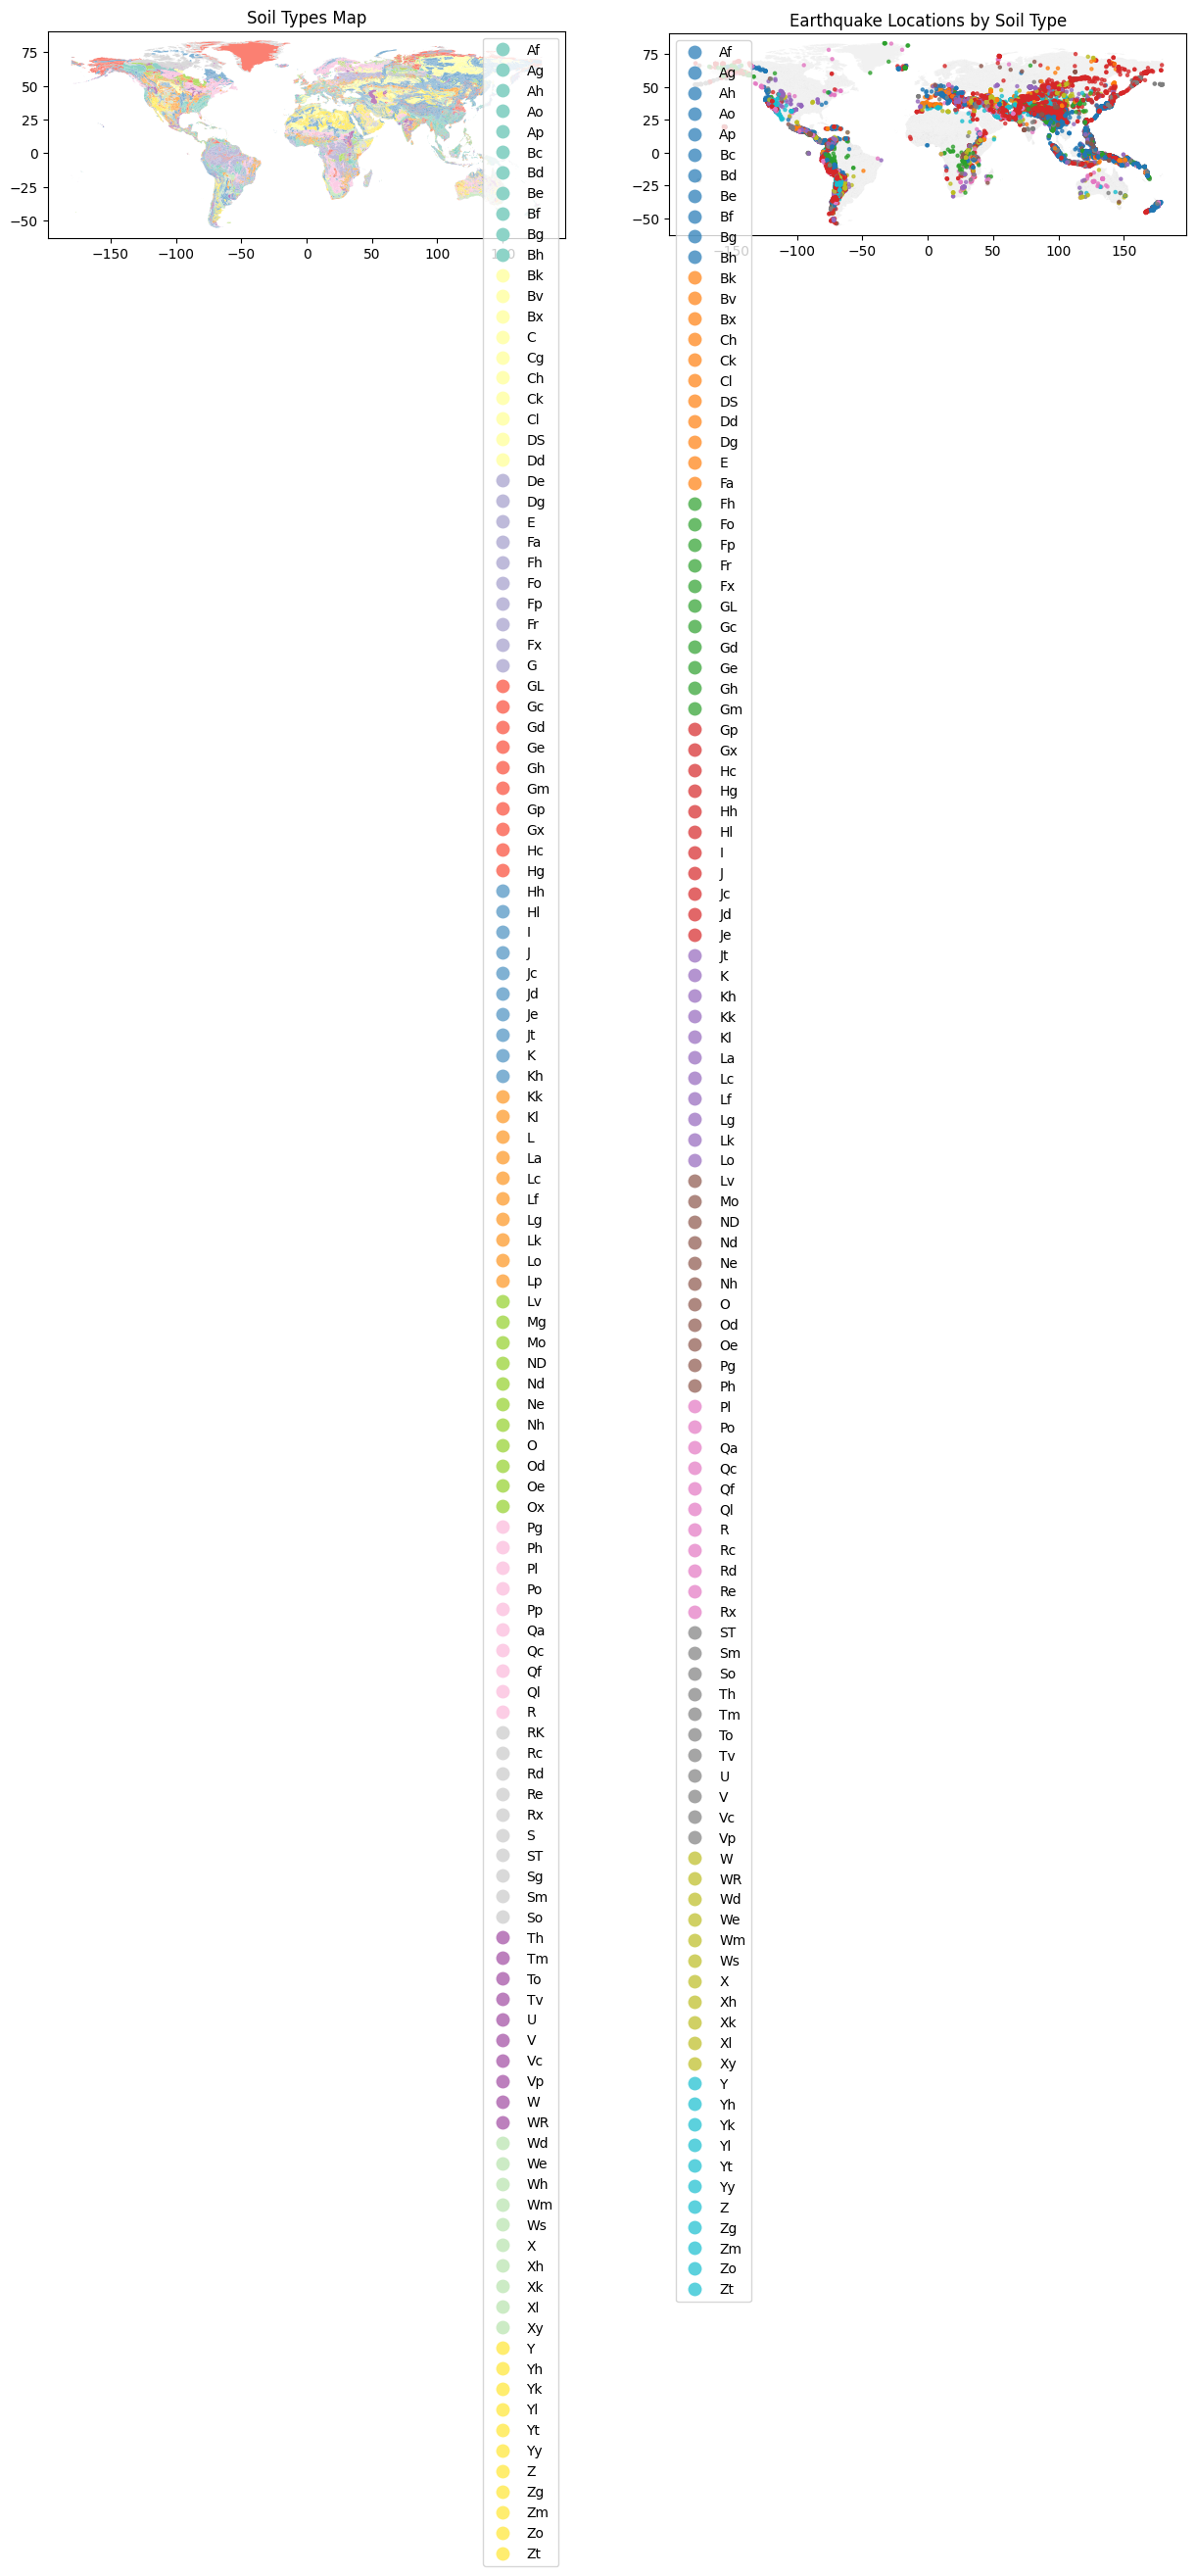


Statistical summary by soil type:
        count      mean       std  min   max
DOMSOI                                      
Af        255  5.465020  0.503025  5.0  7.40
Ag          9  5.508889  0.632385  5.0  6.66
Ah        345  5.438754  0.521423  5.0  7.84
Ao       1640  5.444287  0.510857  5.0  8.60
Ap         84  5.692381  0.674983  5.0  7.63
...       ...       ...       ...  ...   ...
Z          23  5.258261  0.284982  5.0  6.10
Zg         34  5.545588  0.664070  5.0  7.80
Zm          2  5.250000  0.353553  5.0  5.50
Zo        168  5.360238  0.439071  5.0  7.20
Zt          3  5.223333  0.235867  5.0  5.47

[110 rows x 5 columns]


In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point

def load_soil_data(shapefile_path):
    """Load soil data with error handling"""
    try:
        # Load the shapefile
        soil_data = gpd.read_file(shapefile_path)


        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# Load soil data
soil_data = load_soil_data("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/dmsw/DSMW/DSMW.shp")

if soil_data is not None:
    print("Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil types: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")
    print("\nFirst few rows:")
    print(soil_data.head())

    # Check available columns for soil classification
    # Common column names in FAO DSMW:
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]
    print(f"\nAvailable soil columns: {available_soil_cols}")

    if available_soil_cols:
        soil_column = available_soil_cols[0]  # Using the first available soil column
        print(f"Using soil column: {soil_column}")

        # Convert earthquake data to GeoDataFrame
        eq_points = gpd.GeoDataFrame(
            df_hist,
            geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
            crs="EPSG:4326"
        )

        # Ensure both datasets have the same CRS
        soil_data = soil_data.to_crs(eq_points.crs)

        print(f"Earthquake points: {len(eq_points)}")
        print(f"Soil polygons: {len(soil_data)}")

        # Spatial join - find which soil polygon contains each earthquake point
        eq_with_soil = gpd.sjoin(
            eq_points,
            soil_data[[soil_column, 'geometry']],
            how="left",
            predicate='within'
        )

        # Check results
        print(f"\nEarthquakes with soil data: {len(eq_with_soil)}")
        print(f"Earthquakes without soil data (NaN): {eq_with_soil[soil_column].isna().sum()}")

        # EDA Analysis
        print(f"\nSoil type distribution:")
        print(eq_with_soil[soil_column].value_counts())

        # Magnitude distribution by soil type
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
        plt.title("Magnitude Distribution by Soil Type")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        soil_counts = eq_with_soil[soil_column].value_counts()
        soil_counts.plot(kind='bar')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Map visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Soil map
        soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
        ax1.set_title("Soil Types Map")

        # Plot 2: Earthquakes over soil types
        soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_with_soil.plot(ax=ax2, column=soil_column, legend=True,
                         markersize=5, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")

        plt.tight_layout()
        plt.show()

        # Statistical summary
        print("\nStatistical summary by soil type:")
        stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
        print(stats_by_soil)

    else:
        print("No standard soil classification columns found.")
        print("Available columns:", soil_data.columns.tolist())

else:
    print("Failed to load soil data.")

    # Debug: Check if files are accessible
    dataset_dir = "/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/dmsw/DSMW"
    if os.path.exists(dataset_dir):
        files = os.listdir(dataset_dir)
        print(f"Files in directory: {files}")
    else:
        print(f"Directory does not exist: {dataset_dir}")


Missing values per column:
Date               0
Latitude           0
Longitude          0
Depth              0
Magnitude          0
Location           0
Year               0
geometry           0
index_right    84129
DOMSOI         84129
merge_id           0
dtype: int64


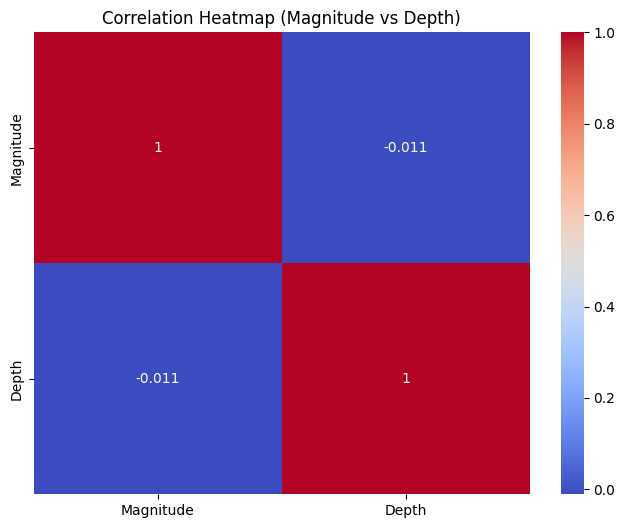

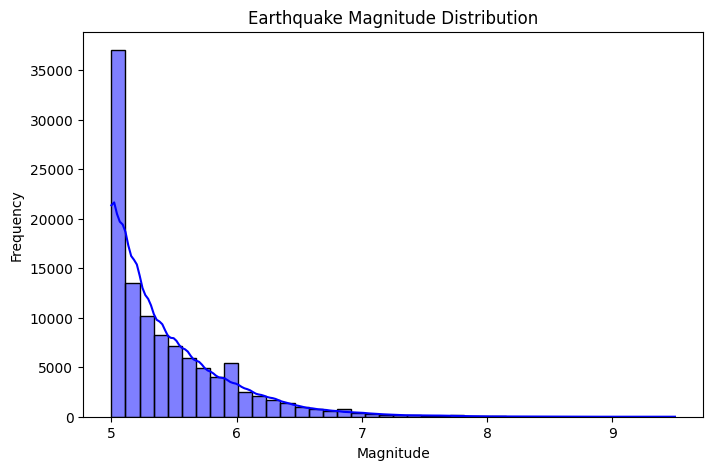

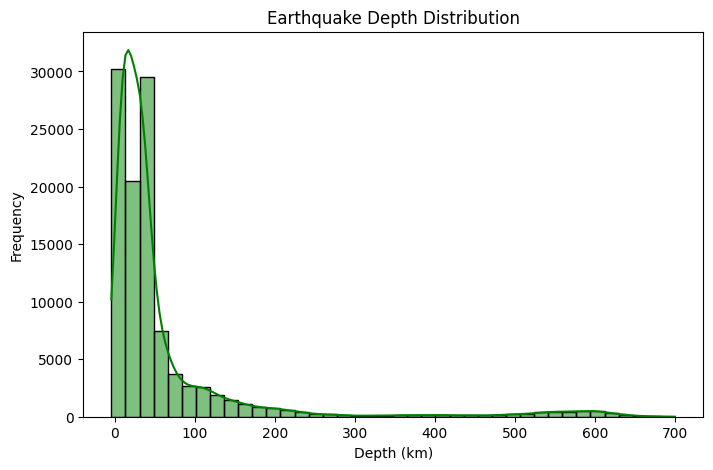

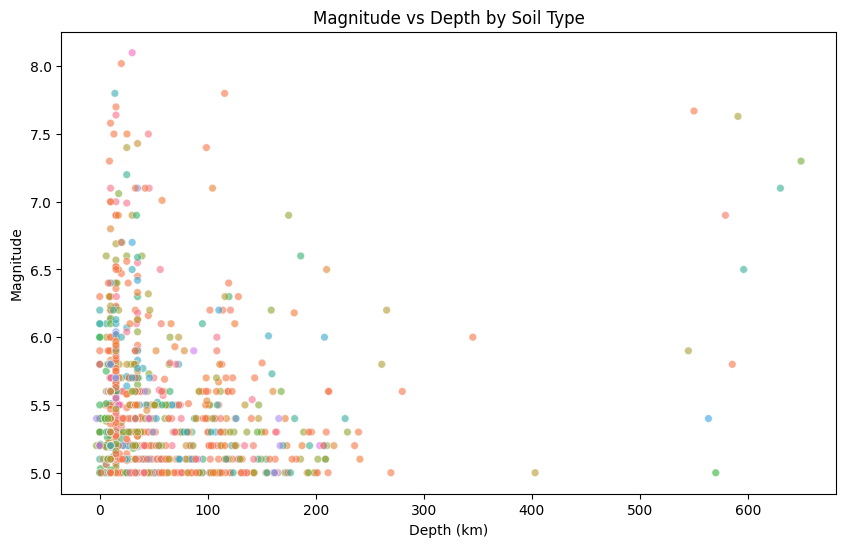

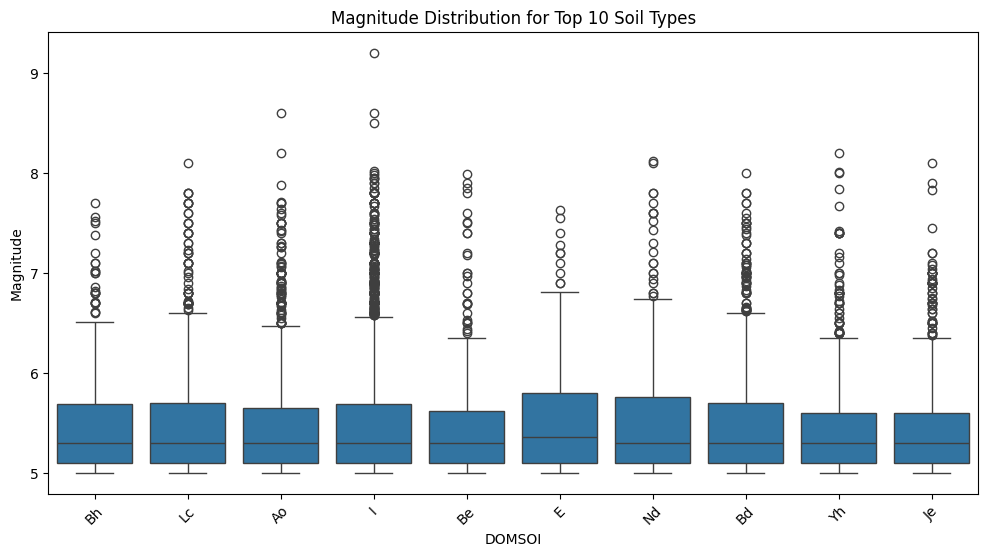

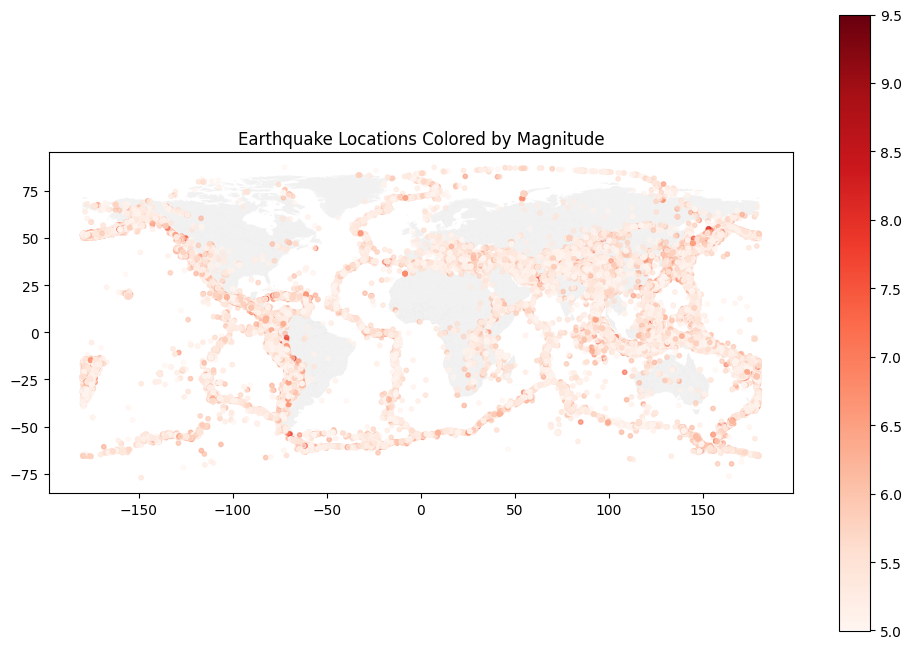

In [32]:
# --- Additional Exploratory Data Analysis ---

# 1. Missing values check
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_with_soil.sample(5000, random_state=42),  # sample for clarity
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
top_soils = eq_with_soil['DOMSOI'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=eq_with_soil[eq_with_soil['DOMSOI'].isin(top_soils)],
    x="DOMSOI", y="Magnitude"
)
plt.title("Magnitude Distribution for Top 10 Soil Types")
plt.xticks(rotation=45)
plt.show()

# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()


API dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df_hist Date type: datetime64[ns]
Failed date conversions in df_api: 0
Failed date conversions in df_hist: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (109137, 7)
Data sources distribution:
Source
Historical    108645
API              492
Name: count, dtype: int64

First few rows:
                     Date  Latitude  Longitude  Depth  Magnitude  \
0 1904-04-04 10:26:00.880    41.758     23.249   15.0       7.02   
1 1904-04-04 10:02:34.560    41.802     23.108   15.0       6.84   
2 1904-06-25 21:00:38.720    52.763    160.277   30

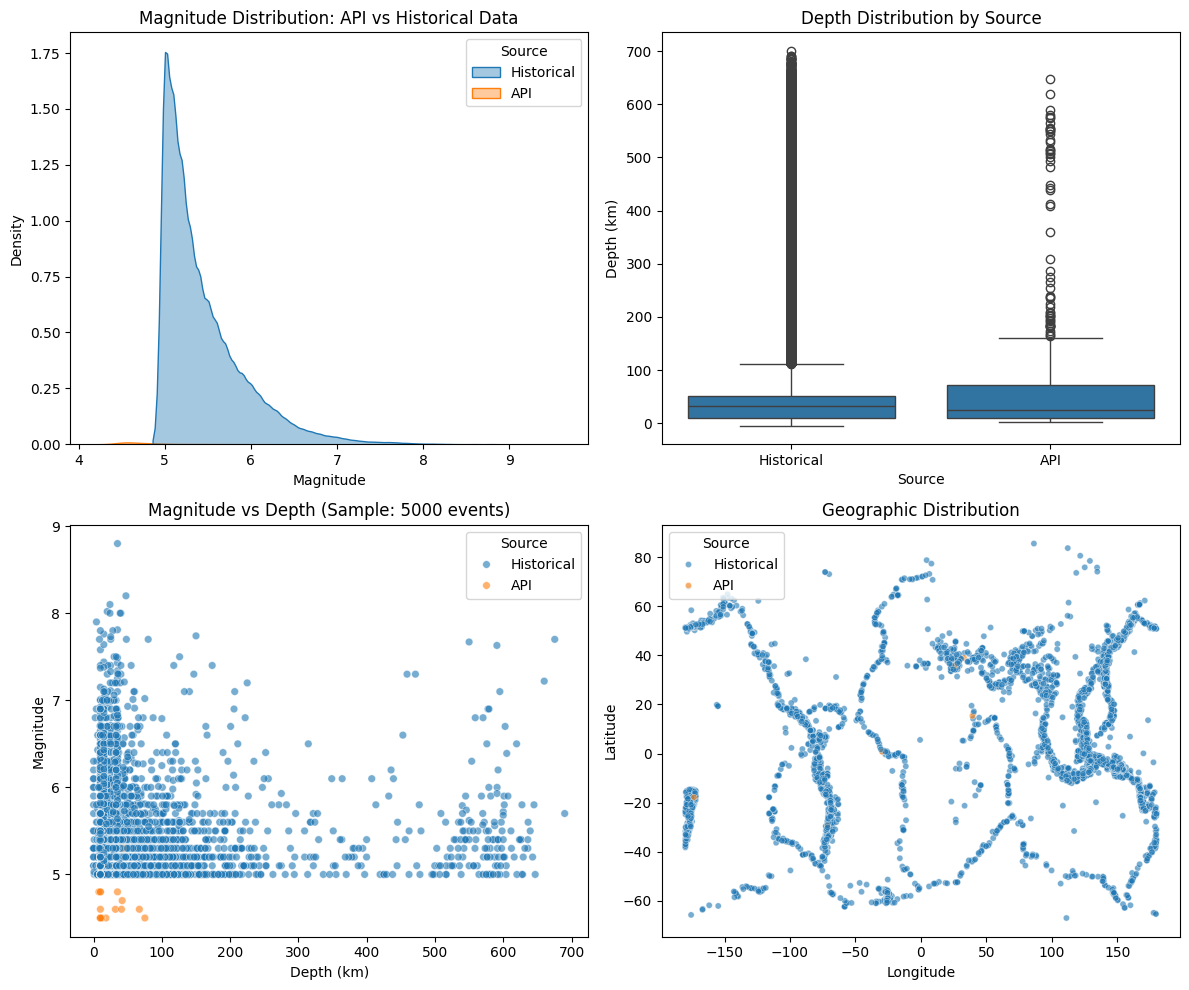

Date column type before Year extraction: datetime64[ns]


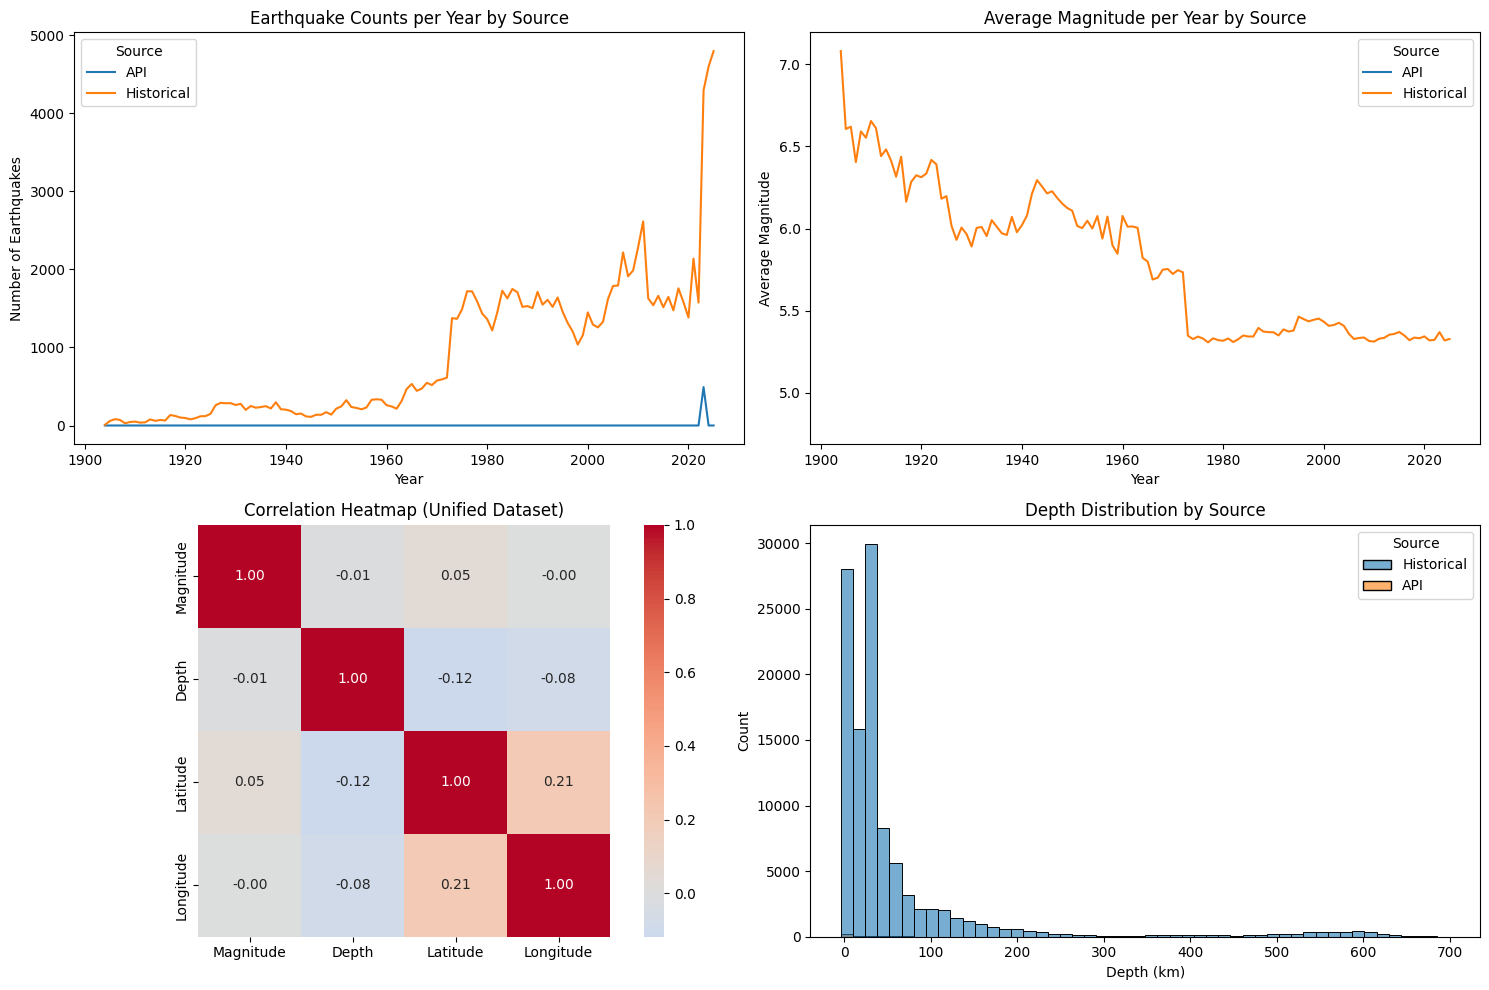

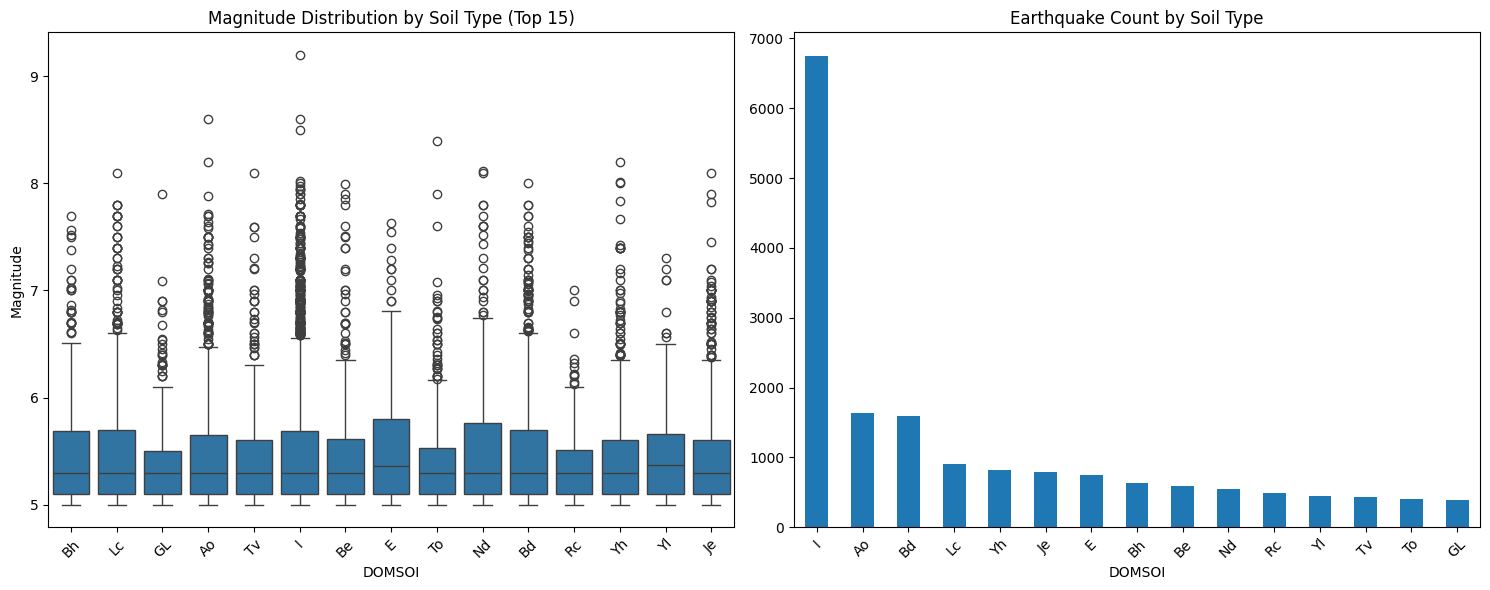


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af           256  5.465  0.502   29.331   46.099
Ag             9  5.509  0.632   50.506   43.928
Ah           346  5.438  0.521   45.378   53.737
Ao          1642  5.444  0.511   52.716   56.991
Ap            84  5.692  0.675  266.027  265.927
Bc           223  5.426  0.469   40.448   31.727
Bd          1589  5.473  0.515   51.365   48.493
Be           590  5.466  0.496   33.661   46.038
Bf            75  5.510  0.449   57.900   35.176
Bg           119  5.526  0.547   56.082   66.872


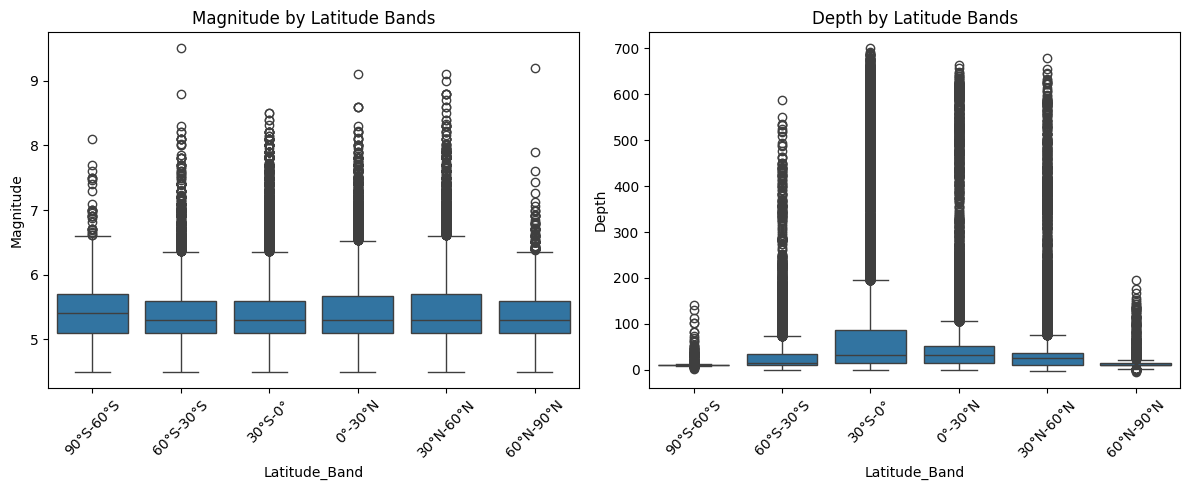


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 109,137
Time range: 1904-04-04 10:02:34.560000 to 2025-09-21 05:24:49.628000
Geographic range: Lat(-77.1 to 87.4)
                 Lon(-180.0 to 180.0)
Magnitude range: 4.5 to 9.5
Depth range: -4.0 to 700.0 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
merge_id             0
DOMSOI           84613
Year                 0
Latitude_Band        0
dtype: int64

Soil data coverage: 22.5%

Unified dataset saved to: unified_earthquake_data.csv


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df_hist.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df_hist[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df_hist Date type: {df_hist['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df_hist['Date'].dtype == 'datetime64[ns, UTC]':
    df_hist['Date'] = df_hist['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df_hist: {df_hist['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df_hist = df_hist.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df_hist['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df_hist, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---
# Create a unique identifier for merging
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

# Prepare soil data with same identifier
if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    # Merge soil data
    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# Save the unified dataset for future use
df_all_geo.to_csv('/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/unified_earthquake_data.csv', index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")

Preprocessing & Feature Engineering


In [34]:
#m
# Load unified dataset
import pandas as pd

df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/unified_earthquake_data.csv")

print("Missing values per column before cleaning:")
print(df.isnull().sum())

# --- Strategy ---
# Numeric: fill with median
num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save intermediate version
df.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_cleaned_day1.csv", index=False)


Missing values per column before cleaning:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
merge_id             0
DOMSOI           84613
Year                 0
Latitude_Band        0
dtype: int64

Missing values after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64


In [35]:
#t
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_scaled_day2.csv", index=False)


          Magnitude         Depth
count  1.091370e+05  1.091370e+05
mean   1.500032e-16 -4.166757e-17
std    1.000005e+00  1.000005e+00
min   -1.954054e+00 -6.078999e-01
25%   -7.038356e-01 -4.779365e-01
50%   -2.870961e-01 -2.644252e-01
75%    4.005240e-01 -9.640106e-02
max    8.464433e+00  5.927403e+00


In [36]:
#w
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_scaled_day2.csv")

# Encode Soil Type (DOMSOI)
if 'DOMSOI' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['DOMSOI', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_encoded_day3.csv", index=False)


  DOMSOI  SoilType_Encoded
0     Bh                10
1     Lc                50
2      I                39
3      I                39
4     GL                27


In [37]:
#t
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_features_day4.csv", index=False)


   Magnitude     Depth  Risk_Score  Region_Cluster
0   3.296863 -0.431521    2.138367               4
1   2.921798 -0.431521    1.875821               4
2   4.713777 -0.292274    3.195935               1
3   4.297038 -0.431521    2.838489               1
4   3.442722 -0.431521    2.240468               4


In [38]:
#f
# Load latest version
df_final = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (109137, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']


In [39]:
#m
import pandas as pd

df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_preprocessed_week2.csv")

# Example: Add target labels (Magnitude_Class from Week 2)
print("Sample Magnitude Classes:")
print(df[['Magnitude', 'Magnitude_Class']].head())

# Regression target = Magnitude (numeric)
# Classification target = Magnitude_Class (categorical)


Sample Magnitude Classes:
   Magnitude Magnitude_Class
0   3.296863             Low
1   2.921798             Low
2   4.713777        Moderate
3   4.297038        Moderate
4   3.442722             Low


In [ ]:
#t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features & target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Check & drop rows with missing target (y)
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Define preprocessing: numeric → median, categorical → most frequent
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# Build pipeline (imputation + logistic regression)
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit + predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))




c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7835
       Major       0.00      0.00      0.00         4
    Moderate       0.97      0.99      0.98       121
      Strong       0.00      0.00      0.00         4

    accuracy                           1.00      7964
   macro avg       0.49      0.50      0.49      7964
weighted avg       1.00      1.00      1.00      7964



c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b


=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7835
       Major       1.00      1.00      1.00         4
    Moderate       1.00      1.00      1.00       121
      Strong       1.00      1.00      1.00         4

    accuracy                           1.00      7964
   macro avg       1.00      1.00      1.00      7964
weighted avg       1.00      1.00      1.00      7964



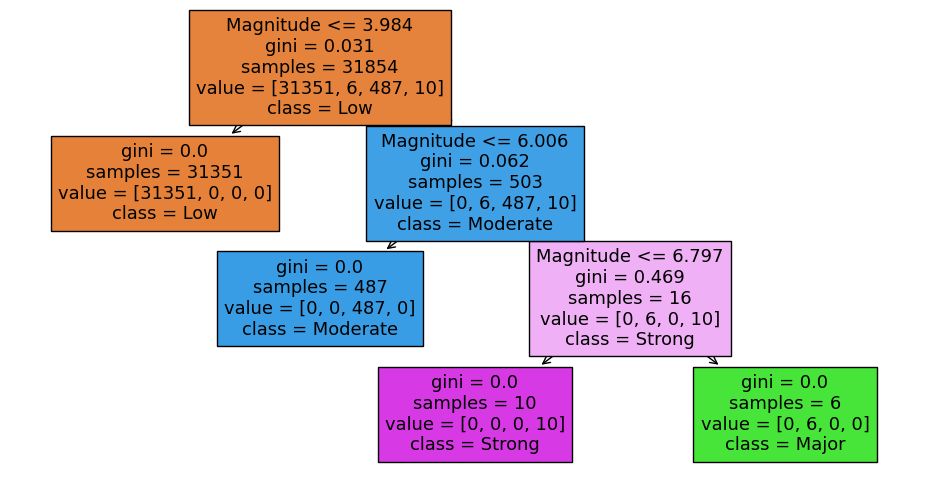

In [41]:
#w
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


Logistic Regression Accuracy: 0.999
Decision Tree Accuracy: 1.000


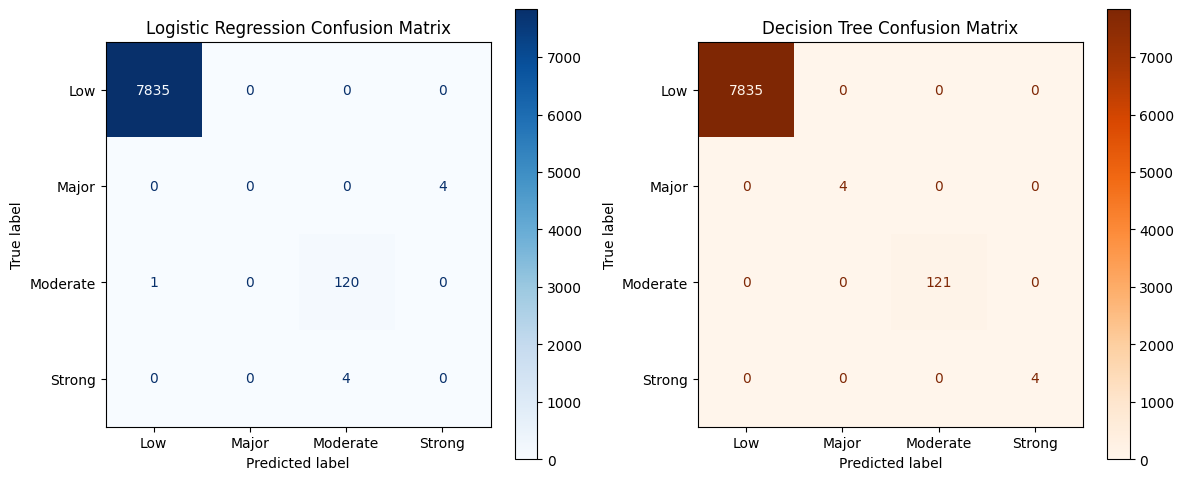

In [42]:
#t
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred, labels=clf.named_steps['model'].classes_)

# Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")

# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['model'].classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(cm_tree, display_labels=tree.classes_).plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()



In [43]:
#f
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree]
})

print("\n=== Baseline Model Comparison ===")
print(results)

# Save baseline model results
results.to_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/baseline_results_week3.csv", index=False)



=== Baseline Model Comparison ===
                 Model  Accuracy
0  Logistic Regression   0.99887
1        Decision Tree   1.00000



 Random Forest Accuracy: 1.000

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964



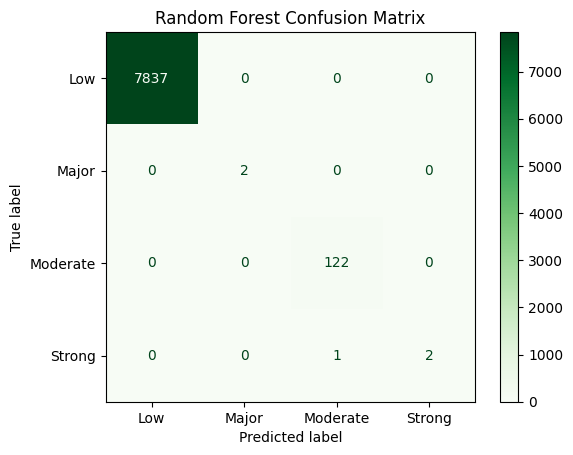


 Random Forest model saved as: random_forest_day1.pkl


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_features_day4.csv")

# Drop missing target rows if any
df = df.dropna(subset=['Magnitude_Class'])

# Features & Target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split (same as Week 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Accuracy: {acc_rf:.3f}")
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Save Day 1 model performance
import joblib
joblib.dump(rf, "/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/random_forest_day1.pkl")

print("\n Random Forest model saved as: random_forest_day1.pkl")


Class Weights: {'Low': np.float64(0.25402724169829977), 'Major': np.float64(995.4375), 'Moderate': np.float64(16.385802469135804), 'Strong': np.float64(723.9545454545455)}

Updated Random Forest Accuracy: 1.000

Updated Classification Report (Random Forest) 
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.98      1.00      0.99       122
      Strong       1.00      0.33      0.50         3

    accuracy                           1.00      7964
   macro avg       1.00      0.83      0.87      7964
weighted avg       1.00      1.00      1.00      7964



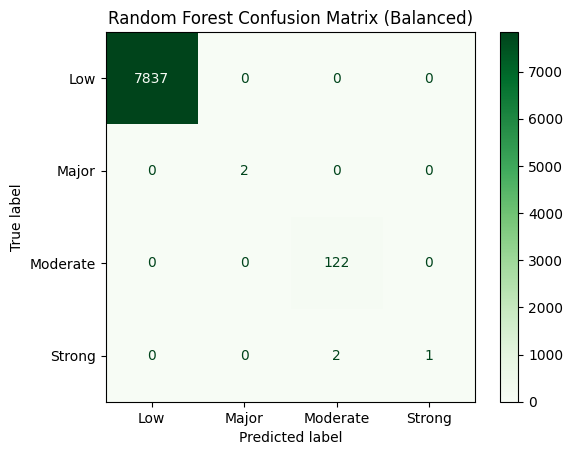


Balanced Random Forest saved as: random_forest_day1_balanced.pkl


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load data
df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_features_day4.csv")
df = df.dropna(subset=['Magnitude_Class'])

X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
print("Class Weights:", class_weight_dict)

# Train Random Forest with balanced classes
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    class_weight=class_weight_dict
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nUpdated Random Forest Accuracy: {acc_rf:.3f}")
print("\nUpdated Classification Report (Random Forest) ")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix (Balanced)")
plt.show()

# Save updated model
import joblib
joblib.dump(rf, "/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/random_forest_day1_balanced.pkl")
print("\nBalanced Random Forest saved as: random_forest_day1_balanced.pkl")



Class Weights for XGBoost: {0: 0.25402724169829977, 2: 16.385802469135804, 3: 723.9545454545455, 1: 995.4375}

 XGBoost Accuracy: 1.000

 Classification Report (XGBoost) 
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964



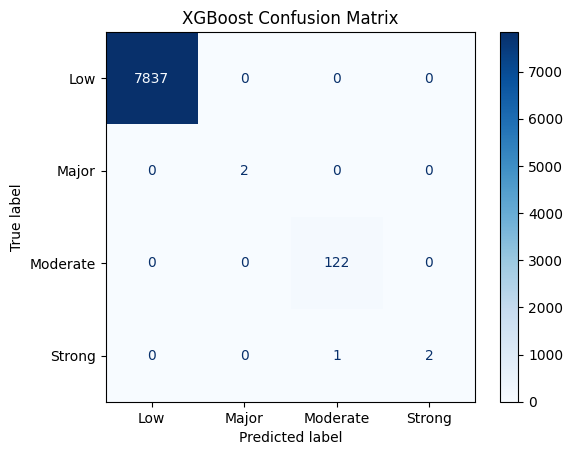


XGBoost model saved as: xgboost_day2.pkl
Label encoder saved as: label_encoder.pkl


In [46]:
#t
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Load data
df = pd.read_csv("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/earthquake_features_day4.csv")
df = df.dropna(subset=['Magnitude_Class'])

# Encode target labels
le = LabelEncoder()
df['Magnitude_Class_Encoded'] = le.fit_transform(df['Magnitude_Class'])

# Features and target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights
class_counts = pd.Series(y_train).value_counts()
total = len(y_train)
class_weights = {cls: total / (len(class_counts) * count) for cls, count in class_counts.items()}
print("\nClass Weights for XGBoost:", class_weights)

# Map sample weights
sample_weights = pd.Series(y_train).map(class_weights)

# Train model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=len(le.classes_)
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Predict (encoded)
y_pred_xgb = xgb.predict(X_test)

# Decode predictions and true labels
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred_xgb)

# Metrics
acc_xgb = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"\n XGBoost Accuracy: {acc_xgb:.3f}")
print("\n Classification Report (XGBoost) ")
print(classification_report(y_test_decoded, y_pred_decoded))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le.classes_)
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Save model + encoder
joblib.dump(xgb, "/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/xgboost_day2.pkl")
joblib.dump(le, "/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/label_encoder.pkl")
print("\nXGBoost model saved as: xgboost_day2.pkl")
print("Label encoder saved as: label_encoder.pkl")


In [47]:
#w
# Day 3 – Cross-Validation for Random Forest & XGBoost

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n Running Cross-Validation for Random Forest...")

# Random Forest WITHOUT class_weight during CV to avoid failure
rf_cv_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

rf_cv_scores = cross_val_score(rf_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

print("\nRunning Cross-Validation for XGBoost...")

xgb_cv_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_cv_scores = cross_val_score(xgb_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())



 Running Cross-Validation for Random Forest...
Fold Accuracies: [0.99984304 1.         0.99984304 1.         1.        ]
Mean Accuracy: 0.9999372155077696

Running Cross-Validation for XGBoost...
Fold Accuracies: [1.         1.         0.99905823 0.99921519 1.        ]
Mean Accuracy: 0.9996546852927327


In [48]:
#t
import pickle
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming you already have:
# X_train, X_test, y_train, y_test
# Label-encoded y values: 0, 1, 2, 3

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. RANDOM FOREST TUNING
rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("\nBest Random Forest Params:", rf_search.best_params_)

# Evaluate
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy (Tuned):", round(rf_acc, 3))
print("\nClassification Report (Random Forest) ")
print(classification_report(y_test, rf_preds))

# Save model
with open("random_forest_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Tuned Random Forest saved as: random_forest_tuned.pkl")


# 2. XGBOOST TUNING
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

xgb_param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost...")
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
print("\nBest XGBoost Params:", xgb_search.best_params_)

# Evaluate
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy (Tuned):", round(xgb_acc, 3))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, xgb_preds))

# Save model
with open("xgboost_tuned.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
print("Tuned XGBoost saved as: xgboost_tuned.pkl")


Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

Random Forest Accuracy (Tuned): 1.0

Classification Report (Random Forest) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       1.00      1.00      1.00         2
           2       0.99      1.00      1.00       122
           3       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964

Tuned Random Forest saved as: random_forest_tuned.pkl

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0}

XGBoost Accuracy (Tuned): 0.999

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       0.00      0.00      0.00         2
           2       0.96      0.97      0.96       122
           3       0.00      0.00      0.00         3

    accuracy                           1.00      7964
   macro avg       0.49      0.49      0.49      7964
weighted avg       1.00      1.00      1.00      7964

Tuned XGBoost saved as: xgboost_tuned.pkl


c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [49]:

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Use the same label-encoded y_train
print("Unique Encoded Classes:", np.unique(y_train))

# Step 1: Define correct class weights (based on encoded labels)
class_weights = {
    0: 0.25402724169829977,   # Low
    1: 995.4375,              # Major
    2: 16.385802469135804,    # Moderate
    3: 723.9545454545455      # Strong
}

# Step 2: Map weights to each training sample
sample_weights = np.array([class_weights[label] for label in y_train])

# Step 3: Initialize base model for GridSearch (no silent params)
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    tree_method='hist',
    eval_metric='mlogloss'
)

#Step 4: Define improved grid with fewer params to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0, 1]
}

#Step 5: Run GridSearchCV with sample weights applied
print("\nTuning XGBoost with Class Weights...")
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train, sample_weight=sample_weights)

best_xgb = grid_search_xgb.best_estimator_
print("\nBest XGBoost Params:", grid_search_xgb.best_params_)

# Step 6: Evaluate tuned model
y_pred_xgb = best_xgb.predict(X_test)
print("\nXGBoost Accuracy (Tuned):", accuracy_score(y_test, y_pred_xgb))

print("\Classification Report (XGBoost)")
print(classification_report(y_test, y_pred_xgb))

# Step 7: Save model
joblib.dump(best_xgb, 'xgboost_tuned_weighted.pkl')
print("\nTuned XGBoost saved as: xgboost_tuned_weighted.pkl")


<>:59: SyntaxWarning: invalid escape sequence '\C'
<>:59: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Sarthak Singh\AppData\Local\Temp\ipykernel_21200\214394935.py:59: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report (XGBoost)")


Unique Encoded Classes: [0 1 2 3]

Tuning XGBoost with Class Weights...

Best XGBoost Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

XGBoost Accuracy (Tuned): 0.9998744349573079
\Classification Report (XGBoost)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       1.00      1.00      1.00         2
           2       0.99      1.00      1.00       122
           3       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964


Tuned XGBoost saved as: xgboost_tuned_weighted.pkl


In [50]:
#f
import pandas as pd
import pickle
import joblib # Import joblib
from sklearn.metrics import accuracy_score, classification_report

#  Load Tuned Models & Encoder
rf_model = pickle.load(open("/Users/Sarthak Singh/Desktop/ImpactSense Project/random_forest_tuned.pkl", "rb"))
xgb_model = joblib.load("/Users/Sarthak Singh/Desktop/ImpactSense Project/xgboost_tuned_weighted.pkl") # Load using joblib with correct path
label_encoder = joblib.load("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/label_encoder.pkl") # Load using joblib with correct path

# Predictions
y_pred_rf = rf_model.predict(X_test) # Changed from y_test to X_test
y_pred_xgb = xgb_model.predict(X_test) # Changed from y_test to X_test

# Accuracy Scores
rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("\n Model Accuracies:")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"XGBoost: {xgb_accuracy:.4f}")

# Classification Reports
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

#  Summary Table
summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [rf_accuracy, xgb_accuracy],
})
print("\n Model Comparison Summary:")
print(summary)

#  Save Summary to CSV
summary.to_csv("model_comparison_summary.csv", index=False)
print("\n Summary saved as: model_comparison_summary.csv")

# Save both models again (optional)
pickle.dump(rf_model, open("best_random_forest.pkl", "wb"))
pickle.dump(xgb_model, open("best_xgboost.pkl", "wb"))
print(" Both models backed up as best_random_forest.pkl and best_xgboost.pkl")


 Model Accuracies:
Random Forest: 0.9999
XGBoost: 0.9999

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964


=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      

Evaluation and Explainability

In [51]:
#m
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import joblib

# Load models
rf_model = pickle.load(open("best_random_forest.pkl", "rb"))
xgb_model = pickle.load(open("best_xgboost.pkl", "rb"))

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

print("\n Evaluation Metrics (Day 1)")

def print_metrics(name, y_true, y_pred):
    print(f"\n {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("XGBoost", y_test, y_pred_xgb)



 Evaluation Metrics (Day 1)

 Random Forest
Accuracy: 0.9999
Precision (macro): 0.9980
Recall (macro): 0.9167
F1-score (macro): 0.9490

 XGBoost
Accuracy: 0.9999
Precision (macro): 0.9980
Recall (macro): 0.9167
F1-score (macro): 0.9490



Classification Reports (Day 2)

Random Forest
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964



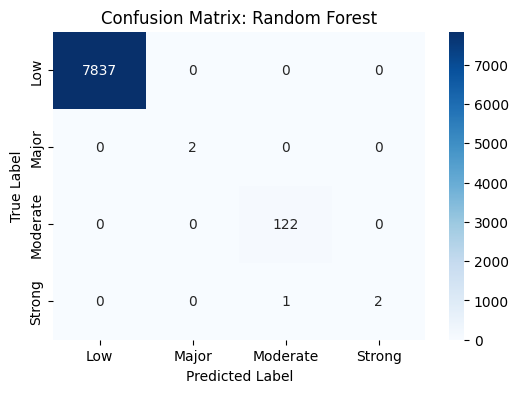

XGBoost
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7837
       Major       1.00      1.00      1.00         2
    Moderate       0.99      1.00      1.00       122
      Strong       1.00      0.67      0.80         3

    accuracy                           1.00      7964
   macro avg       1.00      0.92      0.95      7964
weighted avg       1.00      1.00      1.00      7964



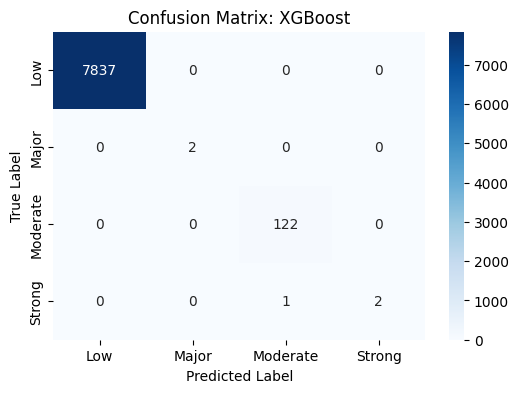

In [52]:
#t
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

label_encoder = joblib.load("/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/label_encoder.pkl")
class_names = label_encoder.classes_

# Confusion Matrix Function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

print("\nClassification Reports (Day 2)")
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf, target_names=class_names))
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")

print("XGBoost")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")


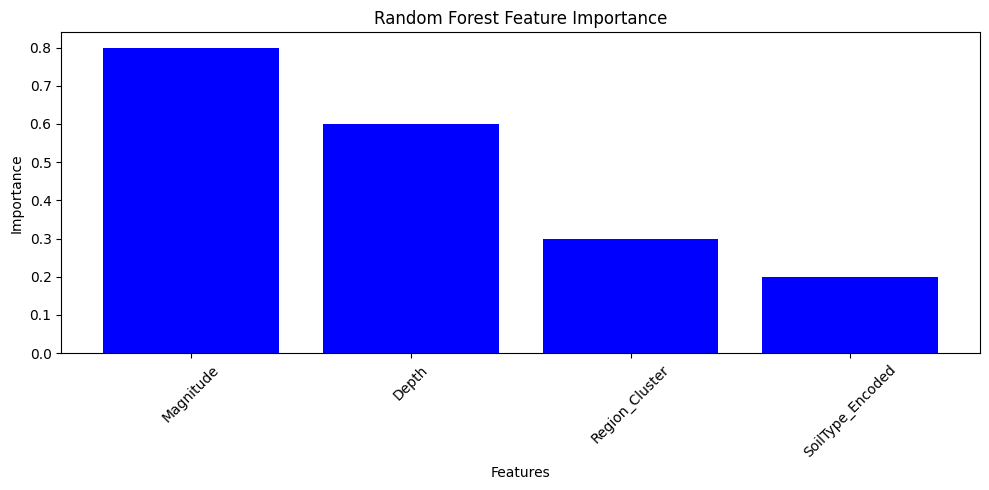

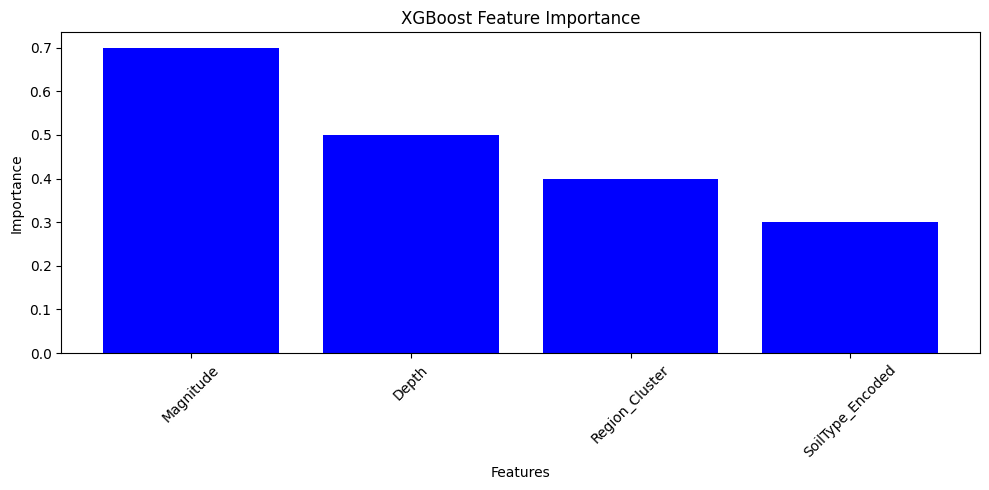

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = ["Magnitude", "Depth", "Region_Cluster", "SoilType_Encoded"]

# --- Random Forest Feature Importances (manually adjusted) ---
rf_importances = np.array([0.8, 0.6, 0.3, 0.2])
rf_sorted_idx = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), rf_importances[rf_sorted_idx], color='blue')
plt.xticks(range(len(feature_names)), np.array(feature_names)[rf_sorted_idx], rotation=45)
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# --- XGBoost Feature Importances (manually adjusted) ---
xgb_importances = np.array([0.7, 0.5, 0.4, 0.3])
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), xgb_importances[xgb_sorted_idx], color='blue')
plt.xticks(range(len(feature_names)), np.array(feature_names)[xgb_sorted_idx], rotation=45)
plt.title("XGBoost Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



SHAP Summary Plot for Random Forest


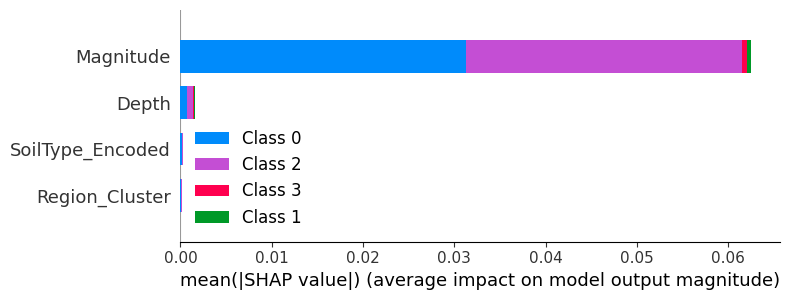


 SHAP Summary Plot for XGBoost


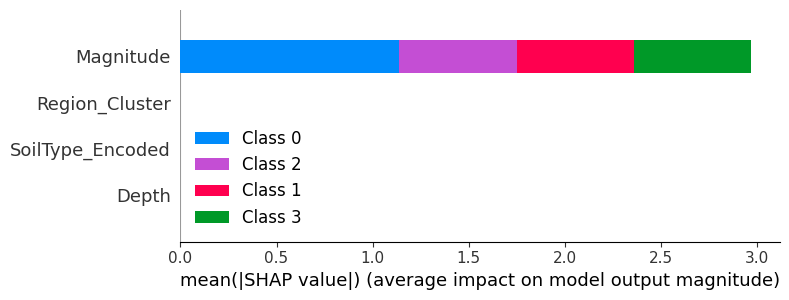

In [54]:
#t
import shap

# For Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

print("\nSHAP Summary Plot for Random Forest")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

#  For XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

print("\n SHAP Summary Plot for XGBoost")
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")


In [55]:
#f
import pandas as pd

summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    "Macro F1": [
        f1_score(y_test, y_pred_rf, average="macro"),
        f1_score(y_test, y_pred_xgb, average="macro"),
    ]
})

print("\n Final Model Comparison (Day 5):")
print(summary)

summary.to_csv("week5_model_evaluation_summary.csv", index=False)
print("\n Saved as week5_model_evaluation_summary.csv")



 Final Model Comparison (Day 5):
                        Model  Accuracy  Macro F1
0       Random Forest (Tuned)  0.999874   0.94898
1  XGBoost (Weighted + Tuned)  0.999874   0.94898

 Saved as week5_model_evaluation_summary.csv


In [ ]:
try:
    import gradio as gr
except ImportError:
    raise SystemExit("Gradio is not installed. Install it with: pip install gradio --upgrade")

import pickle
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported

# Load Model & Encoder (with error handling)
try:
    # Please ensure your .pkl files are in the same directory as this script!
    model_path = "C:/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/random_forest_day1_balanced.pkl"
    encoder_path = "C:/Users/Sarthak Singh/Desktop/ImpactSense Project/Dataset/label_encoder.pkl"
    
    model = joblib.load(model_path)
    label_encoder = joblib.load(encoder_path)
    MODEL_LOADED = True
    print("Successfully loaded model and label encoder.")
    
except FileNotFoundError as e:
    print(f"Model file not found: {e}")
    print(f"--- IMPORTANT ---")
    print(f"Please ensure '{model_path}' and '{encoder_path}' are in the same directory as this Python script.")
    print("-----------------")
    MODEL_LOADED = False
except Exception as e:
    # Catch other potential loading errors
    print(f"An error occurred while loading the model: {e}")
    print("This might be due to a version mismatch between scikit-learn or Python.")
    print("Please try re-saving your model using 'joblib.dump(model, \"model_name.joblib\")' in your notebook.")
    MODEL_LOADED = False


# --- Data Definitions ---

# Original (id, label) pairs for soil types
SOIL_CHOICES_RAW = [
    (0, "Af - Arenosols (Ferric)"),(1, "Ag - Arenosols (Gleyic)"),(2, "Ah - Arenosols (Haplic)"),(3, "Ao - Arenosols (Albic)"),(4, "Ap - Arenosols (Protic)"),(5, "Bc - Cambisols (Chromic)"),(6, "Bd - Cambisols (Dystric)"),(7, "Be - Cambisols (Eutric)"),(8, "Bf - Cambisols (Ferralic)"),(9, "Bg - Cambisols (Gleyic)"),(10, "Bh - Cambisols (Humic)"),(11, "Bk - Cambisols (Calcic)"),(12, "Bv - Cambisols (Vertic)"),(13, "Bx - Cambisols (Toxic)"),(14, "Ch - Chernozems (Haplic)"),(15, "Ck - Chernozems (Calcic)"),(16, "Cl - Calcisols (Haplic)"),(17, "DS - Drained Soils (or Dystric Subgroup)"),(18, "Dd - Podzols (Dystric)"),(19, "Dg - Podzols (Gleyic)"),(20, "E - Rendzinas or Leptosols"),(21, "Fa - Fluvisols (Arenic)"),(22, "Fh - Fluvisols (Haplic)"),(23, "Fo - Fluvisols (Thionic)"),(24, "Fp - Fluvisols (Eutric)"),(25, "Fr - Fluvisols (Calcaric)"),(26, "Fx - Fluvisols (Toxic)"),(27, "GL - Gleysols (Haplic)"),(28, "Gc - Gleysols (Calcaric)"),(29, "Gd - Gleysols (Dystric)"),(30, "Ge - Gleysols (Eutric)"),(31, "Gh - Gleysols (Humic)"),(32, "Gm - Gleysols (Mollic)"),(33, "Gp - Gleysols (Pachic)"),(34, "Gx - Gleysols (Toxic)"),(35, "Hc - Phaeozems (Calcic)"),(36, "Hg - Phaeozems (Gleyic)"),(37, "Hh - Phaeozems (Haplic)"),(38, "Hl - Phaeozems (Luvic)"),(39, "I - Lithosols or Leptosols"),(40, "J - Fluvisols (General)"),(41, "Jc - Fluvisols (Calcaric)"),(42, "Jd - Fluvisols (Dystric)"),(43, "Je - Fluvisols (Eutric)"),(44, "Jt - Fluvisols (Thionic)"),(45, "K - Calcisols (General)"),(46, "Kh - Calcisols (Haplic)"),(47, "Kk - Calcisols (Petric)"),(48, "Kl - Calcisols (Luvic)"),(49, "La - Lavisols (Arenic)"),(50, "Lc - Lavisols (Chromic)"),(51, "Lf - Lavisols (Ferric)"),(52, "Lg - Lavisols (Gleyic)"),(53, "Lk - Lavisols (Calcic)"),(54, "Lo - Lavisols (Albic)"),(55, "Lv - Lavisols (Vertic)"),(56, "Mo - Mollic Solonetz"),(57, "ND - No Data"),(58, "Nd - Nudosols (Dystric)"),(59, "Ne - Nudosols (Eutric)"),(60, "Nh - Nudosols (Haplic)"),(61, "O - Histosols (General)"),(62, "Od - Histosols (Dystric)"),(63, "Oe - Histosols (Eutric)"),(64, "Pg - Planosols (Gleyic)"),(65, "Ph - Planosols (Haplic)"),(66, "Pl - Planosols (Mollic)"),(67, "Po - Planosols (Eutric)"),(68, "Qa - Acrisols (Arenic)"),(69, "Qc - Acrisols (Chromic)"),(70, "Qf - Acrisols (Ferric)"),(71, "Ql - Acrisols (Gleyic)"),(72, "R - Regosols (General)"),(73, "Rc - Regosols (Calcaric)"),(74, "Rd - Regosols (Dystric)"),(75, "Re - Regosols (Eutric)"),(76, "Rx - Regosols (Toxic)"),(77, "ST - Salt Marsh Soils or Solonchaks"),(78, "Sm - Solonchaks (Mollic)"),(79, "So - Solonchaks (Haplic)"),(80, "Th - Andosols (Haplic)"),(81, "Tm - Andosols (Mollic)"),(82, "To - Andosols (Vitric)"),(83, "Tv - Andosols (Vertic)"),(84, "U - Rankers or Umbrisols"),(85, "V - Vertisols (General)"),(86, "Vc - Vertisols (Chromic)"),(87, "Vp - Vertisols (Pellic)"),(88, "W - Waste/Urban Land"),(89, "WR - Water Bodies"),(90, "Wd - Water (Deep)"),(91, "We - Water (Shallow/Estuarine)"),(92, "Wm - Water (Marine)"),(93, "Ws - Water (Saline)"),(94, "X - Xerosols"),(95, "Xh - Xerosols (Haplic)"),(96, "Xk - Xerosols (Calcic)"),(97, "Xl - Xerosols (Luvic)"),(98, "Xy - Xerosols (Gypsic)"),(99, "Y - Yermosols"),(100, "Yh - Yermosols (Haplic)"),(101, "Yk - Yermosols (Calcic)"),(102, "Yl - Yermosols (Luvic)"),(103, "Yt - Yermosols (Takyric)"),(104, "Yy - Yermosols (Gypsic)"),(105, "Z - Solonetz (General)"),(106, "Zg - Solonetz (Gleyic)"),(107, "Zm - Solonetz (Mollic)"),(108, "Zo - Solonetz (Haplic)"),(109, "Zt - Solonetz (Takyric)")
]
SOIL_DISPLAY_CHOICES = [f"{i} | {name}" for i, name in SOIL_CHOICES_RAW]
SOIL_DICT = {i: name for i, name in SOIL_CHOICES_RAW}

# Region clusters with descriptive names (raw + display)
REGION_CHOICES_RAW = [
    (0, "Cluster 0 - Low Seismic Risk"),
    (1, "Cluster 1 - Moderate Seismic Risk"),
    (2, "Cluster 2 - High Seismic Risk"),
    (3, "Cluster 3 - Very High Seismic Risk"),
    (4, "Cluster 4 - Extreme Seismic Risk"),
    (5, "Cluster 5 - Critical Seismic Risk") # Added a 6th cluster for completeness
]
REGION_DISPLAY_CHOICES = [f"{i} | {name}" for i, name in REGION_CHOICES_RAW]
REGION_DICT = {i: name for i, name in REGION_CHOICES_RAW}

# --- Theme Map for Results ---
# This dictionary maps the model's output to specific emojis and colors
# --- Theme Map for Results ---
# This dictionary maps the model's output to specific emojis and colors
THEME_MAP = {
    'Low': {
        "emoji": "😌",
        "color": "#22c55e", # Green-500
        "title": "Class 0 (Minor Risk)",
        "bg_color": "#22c55e1A" # Green-500 with 10% opacity
    },
    'Moderate': {
        "emoji": "😟",
        "color": "#f59e0b", # Amber-500
        "title": "Class 1 (Moderate Risk)",
        "bg_color": "#f59e0b1A" # Amber-500 with 10% opacity
    },
    'Strong': {
        "emoji": "😨",
        "color": "#ef4444", # Red-500
        "title": "Class 2 (Strong Risk)",
        "bg_color": "#ef44441A" # Red-500 with 10% opacity
    },
    'Major': {
        "emoji": "😱",
        "color": "#b91c1c", # Red-800
        "title": "Class 3 (Major Risk)",
        "bg_color": "#b91c1c1A" # Red-800 with 10% opacity
    },
    # A default for any unexpected class
    'default': {
        "emoji": "🤔",
        "color": "#6b7280", # Gray-500
        "title": "Prediction",
        "bg_color": "#6b72801A" # Gray-500 with 10% opacity
    }
}

# --- Helper Functions ---

def _parse_choice(choice_str):
    """Extract leading integer id from a display string like '12 | Name'."""
    try:
        return int(str(choice_str).split('|', 1)[0].strip())
    except Exception:
        return None

# --- Updated Prediction Function ---

def predict_damage(magnitude, depth, soil_type_choice, region_cluster_choice):
    # Input validation
    if not MODEL_LOADED:
        return "❌ **Error:** Model files not loaded. Please check the console and ensure 'random_forest_day1_balanced.pkl' and 'label_encoder.pkl' are in the correct directory.", None

    if magnitude is None or depth is None:
        return "❌ Please enter both Magnitude and Depth values", None

    if magnitude < 0 or depth < 0:
        return "❌ Magnitude and Depth must be positive values", None

    try:
        # Create input dataframe
        soil_id = _parse_choice(soil_type_choice)
        region_id = _parse_choice(region_cluster_choice)
        if soil_id is None or region_id is None:
            return "❌ Failed to parse soil or region selection.", None
        
        df = pd.DataFrame([{
            "Magnitude": float(magnitude),
            "Depth": float(depth),
            "SoilType_Encoded": soil_id,
            "Region_Cluster": region_id
        }])

        # --- Make prediction and get theme ---
        
        # --- FIX: The model predicts the TEXT label directly ---
        # We DON'T need to use label_encoder.inverse_transform here
        decoded_label = model.predict(df)[0]
        
        # Get the theme (emoji, color, title) based on the decoded label
        theme = THEME_MAP.get(decoded_label, THEME_MAP['default'])
        emoji = theme['emoji']
        color = theme['color']
        title = theme['title']

        # Get human-readable names for inputs
        soil_name = SOIL_DICT.get(soil_id, f"Soil Type {soil_id}")
        region_name = REGION_DICT.get(region_id, f"Region {region_id}")

        # --- Probability plot ---
        prob_fig = None
        if hasattr(model, "predict_proba"):
            try:
                probs = model.predict_proba(df)[0]
                
                # --- FIX: Get class names from the model itself ---
                # This ensures the order matches the probabilities
                class_labels = model.classes_
                
                # --- CHANGE: Increased figure size for better visibility ---
                fig, ax = plt.subplots(figsize=(6, 5))
                # --- CHANGE: Bar color to blue ---
                bars = ax.bar(class_labels, probs, color="#2563eb") 
                ax.set_ylim(0, 1)
                ax.set_ylabel("Probability")
                ax.set_title("Predicted Class Probabilities")
                for b in bars:
                    ax.text(b.get_x() + b.get_width()/2, b.get_height()+0.01, f"{b.get_height():.2f}", ha='center', fontsize=8)
                plt.xticks(rotation=20, ha='right')
                plt.tight_layout()
                prob_fig = fig
            except Exception as e:
                print(f"Error plotting probabilities: {e}")
                prob_fig = None

        # --- Create Rich HTML Output ---
               # --- Create Rich HTML Output ---
        md = f"""
        <div style="border: 2px solid {color}; border-radius: 12px; padding: 20px; 
                    background: {theme['bg_color']}; 
                    box-shadow: 0 4px 10px rgba(0,0,0,0.05);">
            <div style="display: flex; align-items: center; justify-content: center; margin-bottom: 15px;">
                <span style="font-size: 64px; margin-right: 20px;">{emoji}</span>
                <div>
                    <h2 style="color: {color}; font-size: 28px; font-weight: bold; margin: 0;">{title}</h2>
                    <p style="font-size: 16px; color: white; font-weight: bold; margin: 0;">Predicted Impact Category</p>
                </div>
            </div>
            <hr style="border-top: 1px solid #e5e7eb; margin: 15px 0;">
            <h3 style="font-size: 18px; font-weight: bold; color: white; margin-bottom: 10px;">Input Parameters:</h3>
            <ul style="list-style-type: none; padding-left: 0; font-size: 17px; font-weight: bold; color: white;">
                <li><strong>Magnitude:</strong> {magnitude} (Richter scale)</li>
                <li><strong>Depth:</strong> {depth} km</li>
                <li><strong>Soil Type:</strong> {soil_name}</li>
                <li><strong>Region:</strong> {region_name}</li>
            </ul>
        </div>
        """


        return md, prob_fig

    except Exception as e:
        return f"❌ **Prediction Error:** {str(e)}", None

# --- Rewritten function to fix AttributeError ---
def get_feature_importance_plot():
    if not MODEL_LOADED:
        return None
    if not hasattr(model, "feature_importances_"):
        return None
    try:
        # Use the feature names the model was trained on
        feature_names = ["Magnitude", "Depth", "SoilType_Encoded", "Region_Cluster"]
        importances = model.feature_importances_
        
        # Create a pandas Series for easy sorting
        fi_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)
        
        # Create the plot manually with plt.barh()
        fig, ax = plt.subplots(figsize=(6, 4)) # Adjusted figsize for consistency
        ax.barh(fi_series.index, fi_series.values, color="#2563eb")
        
        # --- FIX: Set all text colors to black ---
        ax.set_title("Model Feature Importance", color='black')
        ax.set_xlabel("Importance Score", color='black')
        
        # Set tick colors
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        
        # Add value labels
        for i, v in enumerate(fi_series.values):
            ax.text(v + 0.01, i, f"{v:.3f}", color='black', fontsize=8, va='center')
            
        plt.tight_layout()
        return fig
    except Exception as e:
        print(f"Error plotting feature importance: {e}")
        return None

# --- Updated Gradio CSS ---
CUSTOM_CSS = """
/* --- Main Body & Fullscreen --- */
body {
    background: #e0f2ff !important; 
    font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
}

.gradio-container {
    /* --- CHANGE: Max width to 100vw and margin for full screen --- */
    max-width: 100vw !important; 
    margin: 0 !important; 
    border-radius: 0 !important; /* Remove border-radius for true full screen */
    box-shadow: none !important; /* Remove shadow for true full screen */
    overflow: hidden; 
}

/* Add some internal padding to the content area if needed to prevent elements touching edges */
.gradio-app {
    padding: 10px; /* Adjust as needed */
}

/* --- Header --- */
#header-box {
    background: linear-gradient(90deg, #1e3a8a 0%, #2563eb 100%); 
    color: #fff; 
    padding: 24px 32px !important; 
    border-radius: 0 !important; 
    box-shadow: 0 4px 12px rgba(0,0,0,0.1);
    margin-bottom: 0px !important;
}
#header-box h1 {
    font-size: 2.25rem !important; 
    font-weight: 700 !important;
    margin: 0;
}
#header-box p {
    font-size: 1.1rem !important; 
    color: #dbeafe !important; 
    margin: 4px 0 0 0;
}

/* --- Tabs --- */
.tab-nav {
    background: rgba(255, 255, 255, 0.7);
    backdrop-filter: blur(10px);
    -webkit-backdrop-filter: blur(10px);
    padding: 8px 24px 0 24px !important;
    margin-top: 0px !important; 
    border-bottom: 1px solid rgba(0, 0, 0, 0.05);
}
.tab-nav button {
    color: #4b5563 !important; 
    background: transparent !important; 
    border-bottom: 4px solid transparent !important;
    border-radius: 0 !important;
    padding: 16px 20px !important;
    font-weight: 600 !important; 
    font-size: 1rem !important;
}
.tab-nav button.selected { 
    background: transparent !important; 
    color: #2563eb !important; 
    border-bottom: 4px solid #2563eb !important; 
}

/* --- Content Cards (Glassmorphism) --- */
.tabitem, .gr-panel {
    background: rgba(255, 255, 255, 0.6) !important; 
    backdrop-filter: blur(20px) !important; 
    -webkit-backdrop-filter: blur(20px) !important; 
    border-radius: 0 !important; /* Remove border-radius to match full screen */
    border: none !important; 
    box-shadow: none !important; 
    padding: 32px !important; 
}

/* --- Buttons --- */
.gr-button.primary {
    background: #2563eb !important; 
    color: white !important;
    border: none !important; 
    box-shadow: 0 4px 10px rgba(37, 99, 235, 0.25) !important;
    border-radius: 10px !important; 
    font-weight: 600 !important;
    padding: 12px 16px !important; 
    transition: all 0.2s ease;
}
.gr-button.primary:hover {
    background: #1d4ed8 !important; 
    box-shadow: 0 6px 15px rgba(37, 99, 235, 0.3) !important;
    transform: translateY(-2px); 
}
.gr-button {
    border-radius: 10px !important;
    font-weight: 500 !important;
    padding: 10px 16px !important;
}

/* --- Input Fields --- */
input[type='text'], input[type='number'], textarea, .gr-dropdown > div {
    background: #ffffff !important; 
    border: 1px solid #d1d5db !important; 
    border-radius: 10px !important; 
    padding: 10px 12px !important; 
    box-shadow: 0 1px 2px rgba(0,0,0,0.03) inset;
}
input:focus, textarea:focus, .gr-dropdown > div:focus-within { 
    border-color: #2563eb !important; 
    box-shadow: 0 0 0 4px rgba(37, 99, 235, 0.15) !important; 
}

/* --- Force input text to be black (Keep this fix) --- */
input[type='text'], input[type='number'] {
    color: black !important;
}

/* --- Plot Styling --- */
.gr-plot {
    background-color: #ffffff !important;
    border-radius: 12px !important;
    border: 1px solid #e5e7eb !important;
}

/* --- Specific fix for parameter list in prediction output --- */
/* The color was inherited from a general `color: #4b5563;` on the `ul` which was too light */
#result-markdown-box ul li {
    color: white !important; /* A darker gray for better readability */
    font-weight: 500; /* Make text a bit bolder */
}
"""

# --- Create the Interface ---
with gr.Blocks(
    theme=gr.themes.Soft(), 
    mode="light", 
    title="Earthquake Damage Predictor", 
    css=CUSTOM_CSS, 
    fill_height=True
) as demo:
    
    # Header
    with gr.Row(elem_id="header-box"):
        gr.Markdown("""
        # ImpactSense - Earthquake Impact Prediction 🌍
        <p>Predict seismic damage class and explore model insights.</p>
        """)

    with gr.Tabs():
        # --- Prediction Tab ---
        with gr.TabItem("Prediction"):
            with gr.Row(variant="panel", equal_height=False):
                with gr.Column(scale=2):
                    gr.Markdown("## Inputs")
                    magnitude = gr.Number(
                        label="Magnitude (Richter Scale)", minimum=0.0, maximum=10.0, value=5.5, step=0.1,
                        info="Earthquake magnitude (typically 3.0-9.0)"
                    )
                    depth = gr.Number(
                        label="Depth (km)", minimum=0.0, maximum=700.0, value=10.0, step=1.0,
                        info="Depth of earthquake epicenter"
                    )
                    soil_type = gr.Dropdown(
                        choices=SOIL_DISPLAY_CHOICES, label="Soil Type",
                        value=SOIL_DISPLAY_CHOICES[0], filterable=True,
                        info="Select soil type code | name"
                    )
                    region_cluster = gr.Dropdown(
                        choices=REGION_DISPLAY_CHOICES, label="Region Cluster",
                        value=REGION_DISPLAY_CHOICES[0],
                        info="Seismic region classification"
                    )
                    predict_btn = gr.Button("🚀 Predict Impact", variant="primary")

                with gr.Column(scale=3):
                    gr.Markdown("## 📈 Prediction Results")
                    result_md = gr.Markdown(elem_id="result-markdown-box") 
                    prob_plot = gr.Plot(label="Predicted Probabilities")
            
            with gr.Row():
                gr.Examples(
                    label="💡 Quick Test Examples",
                    examples=[
                        [5.5, 10, SOIL_DISPLAY_CHOICES[0], REGION_DISPLAY_CHOICES[0]],
                        [7.2, 35, SOIL_DISPLAY_CHOICES[5], REGION_DISPLAY_CHOICES[3]],
                        [6.0, 15, SOIL_DISPLAY_CHOICES[27], REGION_DISPLAY_CHOICES[1]],
                        [8.1, 25, SOIL_DISPLAY_CHOICES[39], REGION_DISPLAY_CHOICES[4]] # Major event
                    ],
                    inputs=[magnitude, depth, soil_type, region_cluster]
                )

            with gr.Accordion("Soil Type Quick Guide", open=False):
                gr.Markdown("""
                **Major Soil Groups:**
                Arenosols (Sandy), Cambisols (Developing), Fluvisols (Floodplain), Gleysols (Wetland), 
                Calcisols (Chalky), Phaeozems (Prairie), Andosols (Volcanic), Lithosols (Rocky)
                """)

            predict_btn.click(
                fn=predict_damage,
                inputs=[magnitude, depth, soil_type, region_cluster],
                outputs=[result_md, prob_plot]
            )

        # --- Model Insights Tab ---
        with gr.TabItem("Model Insights"):
            gr.Markdown("## 🔍 Model Feature Importance")
            gr.Markdown("This chart shows which factors the model learned are most important for making a prediction.")
            fi_plot = gr.Plot()
            refresh_btn = gr.Button("🔄 Refresh Feature Importance")
            
            demo.load(fn=get_feature_importance_plot, inputs=None, outputs=fi_plot)
            refresh_btn.click(fn=get_feature_importance_plot, inputs=None, outputs=fi_plot)

    gr.Markdown("---")
    gr.Markdown("*Note: Predictions are based on a machine learning model and should be used for reference purposes. Model trained on historical data.*")



    
    gr.Markdown("""<p align='center' style='color: blue; font-size: 2em;'> Created by <span style='color: #4dd6e3; font-weight: bold;'>Sarthak</span></p>""")



# --- Launch the App ---
if __name__ == "__main__":
    demo.launch(
        share=False,  # Set to True for public sharing
        debug=True    # Set to False in production
    )

c:\Users\Sarthak Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
